### Logistic Regression

if output is discreate then we use logistic

ex: yes or no get disease or not defective or non defectve

    error 
    mean absolute error
    mean square error
    rmse
    confusionn matrix or ROC curve:
    rse curve :
    true positive(tp)
    false positive(fp)
    true negative(fn)
    true positive rate(tpr)
    false positive rate(ftp)
    accuracy
    

# show null values in dataset

dataset.isnull().sum()
pd.crosstab(dataset['column'],datasetnamae.columns)

##### A popular classification technique to predict binomial outcomes (y = 0 or 1) is called Logistic Regression
Approximately 70% of problems in Data Science are classification problems.
 Logistic regression predicts categorical outcomes (binomial/multinomial values of y), whereas linear Regression is good for predicting continuous-valued outcomes (such as the weight of a person in kg, the amount of rainfall in cm).


In [14]:
import pandas as pd
df=pd.read_csv("Kid.csv")
df.head()

,Obs No.,Buy,Income,Is Female,Is Married,Has College,Is Professional,Is Retired,Unemployed,Residence Length,Dual Income,Minors,Own,House,White,English,Prev Child Mag,Prev Parent Mag
0,1,0,24000,1,0,1,1,0,0,26,0,0,0,1,0,0,0,0
1,2,1,75000,1,1,1,1,0,0,15,1,0,1,1,1,1,1,0
2,3,0,46000,1,1,0,0,0,0,36,1,1,1,1,1,1,0,0
3,4,1,70000,0,1,0,1,0,0,55,0,0,1,1,1,1,1,0
4,5,0,43000,1,0,0,0,0,0,27,0,0,0,0,1,1,0,1


In [3]:
df.drop(columns=['Obs No.']).head()

,Buy,Income,Is Female,Is Married,Has College,Is Professional,Is Retired,Unemployed,Residence Length,Dual Income,Minors,Own,House,White,English,Prev Child Mag,Prev Parent Mag
0,0,24000,1,0,1,1,0,0,26,0,0,0,1,0,0,0,0
1,1,75000,1,1,1,1,0,0,15,1,0,1,1,1,1,1,0
2,0,46000,1,1,0,0,0,0,36,1,1,1,1,1,1,0,0
3,1,70000,0,1,0,1,0,0,55,0,0,1,1,1,1,1,0
4,0,43000,1,0,0,0,0,0,27,0,0,0,0,1,1,0,1


In [4]:
df.isnull().sum()

Obs No.             0
Buy                 0
Income              0
Is Female           0
Is Married          0
Has College         0
Is Professional     0
Is Retired          0
Unemployed          0
Residence Length    0
Dual Income         0
Minors              0
Own                 0
House               0
White               0
English             0
Prev Child Mag      0
Prev Parent Mag     0
dtype: int64

In [5]:
X=df[['Income','Is Female', 'Is Married', 'Has College', 'Is Professional', 'Is Retired', 'Unemployed', 'Residence Length', 'Dual Income','Minors','Own', 'House','White',
'English', 'Prev Child Mag', 'Prev Parent Mag']]
y = df['Buy']

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size = 0.1)

In [7]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(605, 16)
(68, 16)
(605,)
(68,)


In [8]:
from sklearn.linear_model import LogisticRegression 
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)

C:\Users\GANESHBABU\Anaconda3\include\New folder\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
y_pred=logreg.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0], dtype=int64)

In [26]:
Y_test

517    0
663    0
393    0
534    0
225    0
647    0
220    0
95     1
361    0
590    1
469    0
390    0
286    0
538    0
584    0
557    0
284    0
491    0
669    0
222    0
103    0
668    0
608    0
617    0
94     0
127    1
323    0
632    0
575    0
569    0
      ..
547    0
596    1
462    0
442    0
484    0
123    0
230    0
86     1
193    1
412    0
32     1
4      0
226    1
306    0
371    0
132    0
207    0
177    0
142    0
152    0
151    0
19     0
182    1
44     0
433    1
295    0
413    1
426    0
105    1
155    0
Name: Buy, Length: 68, dtype: int64

In [14]:

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
cnf_matrix

array([[53,  3],
       [ 2, 10]], dtype=int64)

In [15]:
from matplotlib import pyplot as plt
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [17]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test,y_pred )

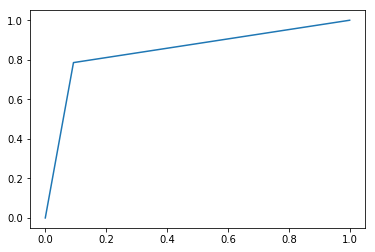

In [18]:
plt.plot(fpr, tpr)

In [24]:
from sklearn.metrics import roc_auc_score as r
r(Y_test,y_pred)


0.8898809523809524

In [25]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))

Accuracy: 0.9264705882352942
Precision: 0.7692307692307693
Recall: 0.8333333333333334


<function matplotlib.pyplot.show(*args, **kw)>

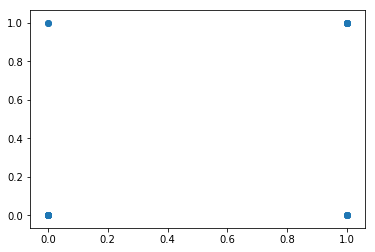

In [15]:
from matplotlib import pyplot as plt
plt.scatter(Y_test,y_pred)
plt.show